# __Feature Engineering__

---

1. Import packages
2. Load data
3. Feature engineering

---

## __1. Import packages__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## __2. Load data__

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. __Feature engineering__

__Difference between off-peak prices in December and preceding January__

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

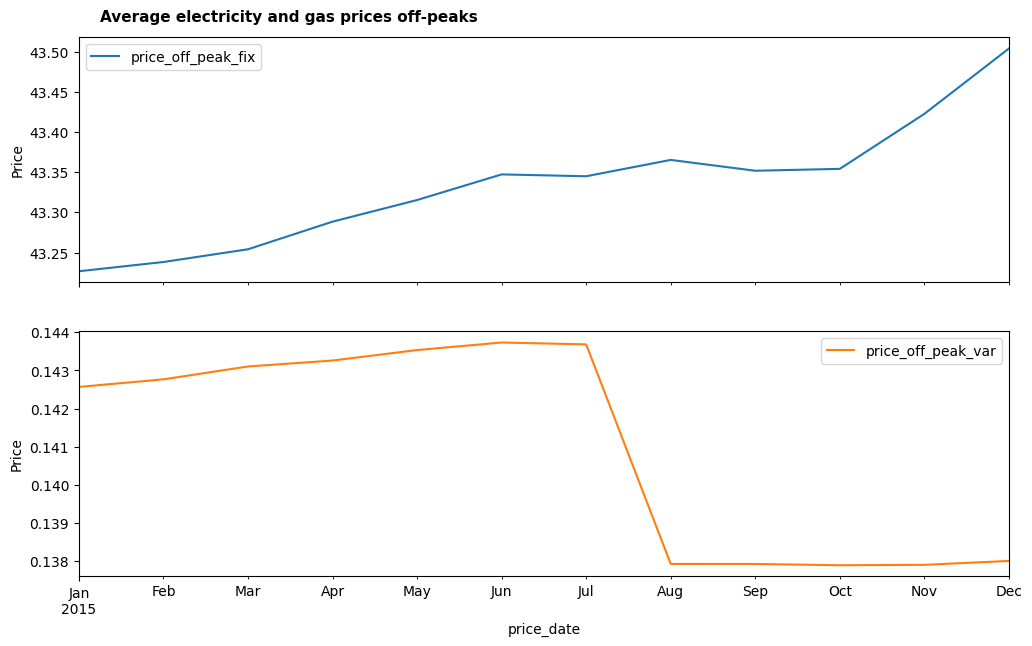

In [6]:
price_df.resample('MS', on='price_date')[['price_off_peak_fix', 'price_off_peak_var']].mean().plot(
    subplots=True, figsize=(12,7), ylabel='Price')
plt.suptitle('Average electricity and gas prices off-peaks', x=0.3, y=0.92, fontsize=11, fontweight='bold')
plt.show()

We will create 

- The average electricity and gas prices of each client over the 12-month period
- The difference in price between the last 5-month and the 5-months preceding it
- The number of days from contract modification to the next renewal of the contract
- The number of days from contract modification to start and end of contract
- Duration of signed contract
- Total electricity consumption 
- Difference between off-peak prices and peak/mid-peak prices prices and difference between peak and mid-peak prices
- A binary variable that indicates if a customer subscribed to electricity billing
- A binary variable to indicate if a customer has a current paid consumption (imp_cos)

__Average electricity and gas prices over the 12-month period__

In [7]:
# average gas and electricity prices off peak, during peak and on mid-peak periods
mean_prices = (
    price_df.drop('price_date', axis=1).groupby('id').mean()
    .rename({i:'mean_'+i for i in price_df.columns if 'fix' in i or 'var' in i}, axis=1)
    .merge(df, on='id', how='right')
    .filter(regex='mean|^id$')
 )

In [8]:
mean_prices.columns

Index(['id', 'mean_price_off_peak_var', 'mean_price_peak_var',
       'mean_price_mid_peak_var', 'mean_price_off_peak_fix',
       'mean_price_peak_fix', 'mean_price_mid_peak_fix'],
      dtype='object')

In [9]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['mean_price_off_peak_var'] - mean_prices['mean_price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['mean_price_peak_var'] - mean_prices['mean_price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['mean_price_off_peak_var'] - mean_prices['mean_price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['mean_price_off_peak_fix'] - mean_prices['mean_price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['mean_price_peak_fix'] - mean_prices['mean_price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['mean_price_off_peak_fix'] - mean_prices['mean_price_mid_peak_fix']

In [10]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

mean_prices = mean_prices[columns]

__Maximum change in price per moonth__

In [11]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [12]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [13]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [14]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

max_diff_across_periods_months = max_diff_across_periods_months[columns]

__Electricity and gas price change the past n-months and the months preceding it__

In [15]:
def price_change(df, n_months=6):
    """
    Calculates the average gas and electricity bill last n months and checks their difference
    """
    last_n_month = df.set_index('price_date').groupby('id').nth(range(-n_months,0)).groupby('id').mean()
    prev_n_month = df.set_index('price_date').groupby('id').nth(range(-n_months*2,-n_months)).groupby('id').mean()
    price_diff = (last_n_month - prev_n_month)
    price_diff.columns = [i+f'_{n_months}m_diff' for i in price_diff.columns]
    return price_diff

In [16]:
# energy and power price last 6 months
price_diff = price_change(price_df, 6)

__Price fluctuation__

Average monthly change in energy and power prices

In [17]:
# get the average price difference over the year
price_fluctuation = price_df.set_index('price_date').groupby('id').apply(lambda x: x.diff().mean())
price_fluctuation.columns = [i+'_avg_price_chg' for i in price_fluctuation.columns]

__Date features extraction__

- Number of months from start of contract to contract modification
- Number of months from contract modification to end of contract
- Number of months from contract modification to next contract renewal
- Contract duration (in months)

In [18]:
df = df.assign(
    cont_mod_activ_month = (df.date_modif_prod - df.date_activ).dt.days / 30,
    cont_mod_end_num = (df.date_end - df.date_modif_prod).dt.days / 30,
    cont_mod_renew_num = (df.date_renewal - df.date_modif_prod).dt.days / 30,
    cont_duration = (df.date_end - df.date_activ).dt.days / 30
)


__Total electricity consumed__

In [19]:
df['total_cons_elec'] = df[['cons_12m', 'cons_last_month']].sum(1)

__is not Electricity subscriber and has current paid consumption__

In [20]:
df['no_elec'] = np.where(df['total_cons_elec'] > 0, 'f', 't')
df['has_paid_cons'] = np.where(df.imp_cons > 0, 't', 'f')

__Merging data to main dataset__

In [21]:
df = (
    df
    .merge(diff, on='id')
    .merge(mean_prices, on='id', how='left')
    .merge(max_diff_across_periods_months, on='id', how='left')
    .merge(price_diff, on='id', how='left')
    .merge(price_fluctuation, on='id', how='left')
    .set_index('id'))

__Handling categorical variables__

- We will one hot encode categorical variables with more than 2 categories and convert to binary variables categorical variables with 2 categories

In [22]:
binary_map = {'f':0, 't':1}

In [23]:
df[['has_gas', 'has_paid_cons', 'no_elec']] = df[['has_gas', 'has_paid_cons', 'no_elec']].apply(
    lambda x: [binary_map.get(i) for i in x]
)

__Recoding channel and origin up variables__

In [24]:
df.channel_sales.value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [25]:
df.origin_up.value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [26]:
# recoding the sales channel and electricity campaign type of customer
channel_map = {j:f'cs{i}' for i, j in enumerate(np.sort(df.channel_sales.unique()), start=1)}
origin_up_map = {j:f'ct{i}' for i, j in enumerate(np.sort(df.origin_up.unique()), start=1)}

In [27]:
channel_map

{'MISSING': 'cs1',
 'epumfxlbckeskwekxbiuasklxalciiuu': 'cs2',
 'ewpakwlliwisiwduibdlfmalxowmwpci': 'cs3',
 'fixdbufsefwooaasfcxdxadsiekoceaa': 'cs4',
 'foosdfpfkusacimwkcsosbicdxkicaua': 'cs5',
 'lmkebamcaaclubfxadlmueccxoimlema': 'cs6',
 'sddiedcslfslkckwlfkdpoeeailfpeds': 'cs7',
 'usilxuppasemubllopkaafesmlibmsdf': 'cs8'}

In [28]:
origin_up_map

{'MISSING': 'ct1',
 'ewxeelcelemmiwuafmddpobolfuxioce': 'ct2',
 'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'ct3',
 'ldkssxwpmemidmecebumciepifcamkci': 'ct4',
 'lxidpiddsbxsbosboudacockeimpuepw': 'ct5',
 'usapbepcfoloekilkwsdiboslwaxobdp': 'ct6'}

In [29]:
# recoding the categorical variables
df = df.assign(channel_sales = df.channel_sales.map(channel_map), 
               origin_up = df.origin_up.map(origin_up_map))

In [30]:
df = pd.get_dummies(df, dtype='int')

In [31]:
# dropping less frequent categories
df = df.drop(columns=['origin_up_ct1', 'origin_up_ct6', 'origin_up_ct2', 'channel_sales_cs7', 'channel_sales_cs2', 'channel_sales_cs4'])

__Selecting relevant features__

- We will be dropping the date features

In [32]:
# select relevant variables
df = df.drop(columns=[col for col in df.columns if 'date' in col])

__Checking for multicolinearity__

In [33]:
corr = df.loc[:, (df.nunique() != 2)].corr()

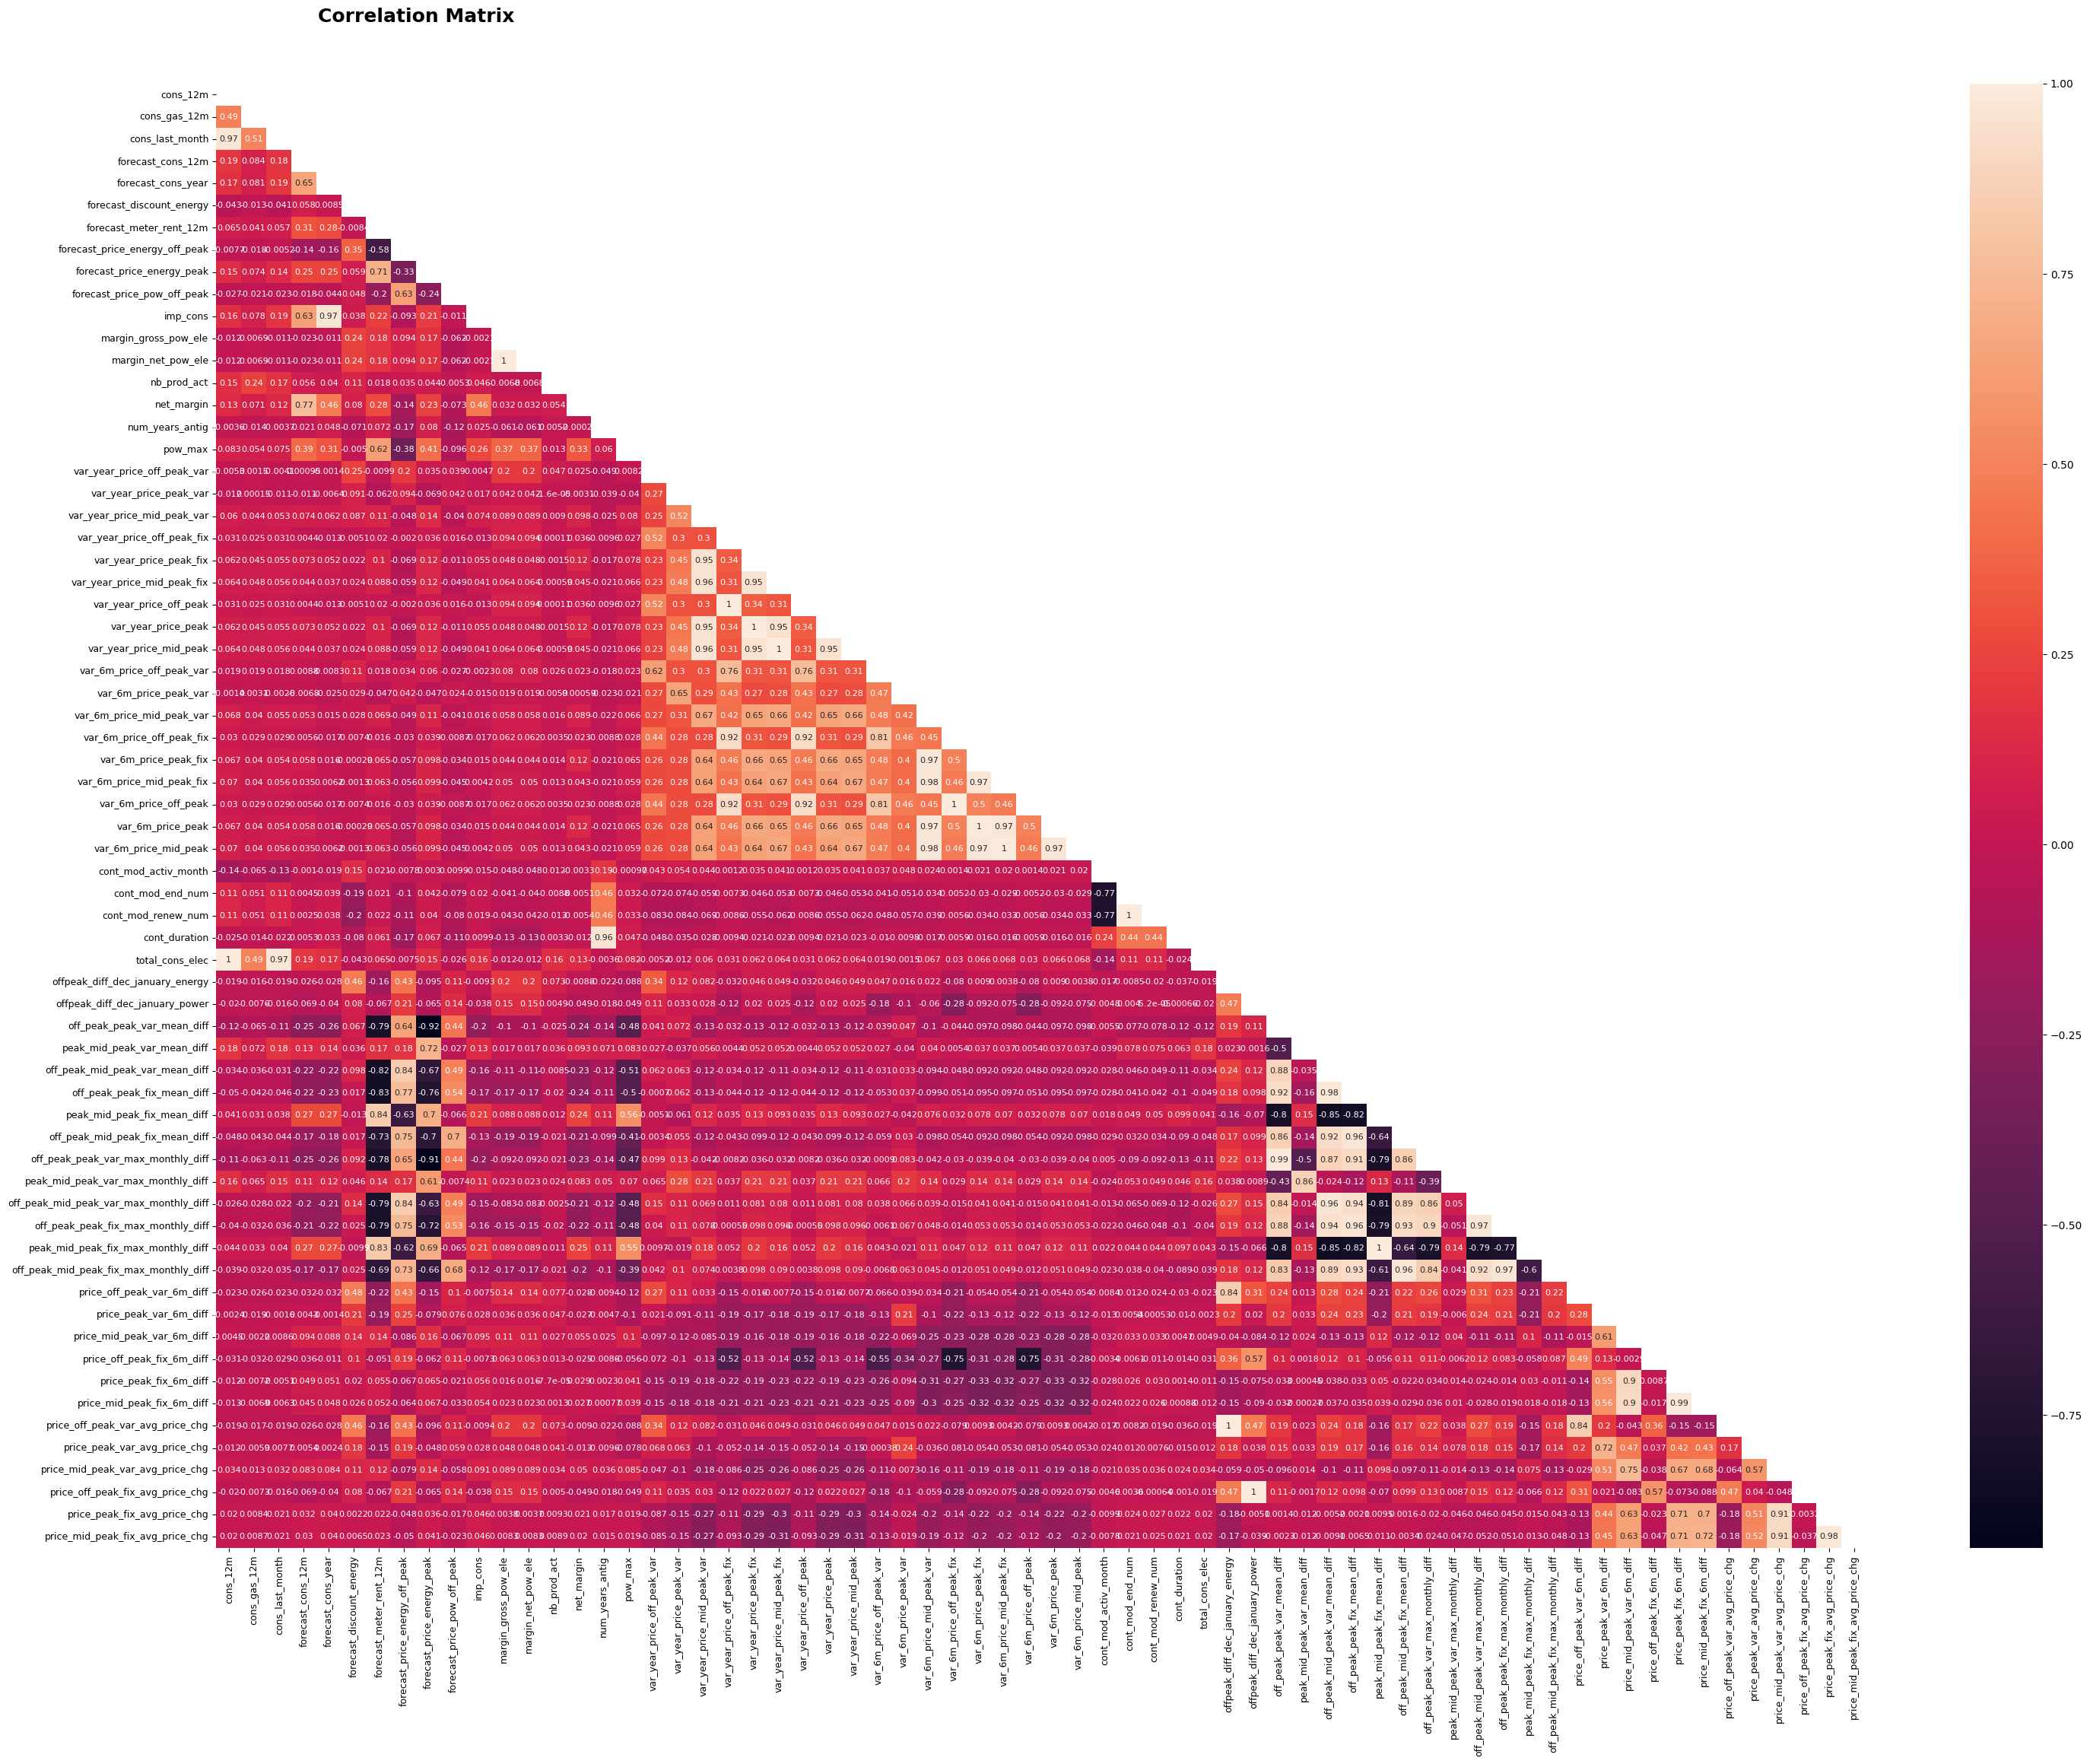

In [34]:
fig, ax = plt.subplots(1, figsize=(35,25))
sns.heatmap(corr, mask=np.triu(corr), ax=ax, annot=True, annot_kws={'size':8})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
fig.suptitle('Correlation Matrix', x=0.2, fontsize=18, fontweight='bold', y=0.92)
plt.show()

- We will drop the cons_12m and cons_last_month variables since they were combined to obtain the total electricity used by a customer. We will create a binary variable to indicate if the customer paid for electricity consumption last month

In [35]:
df = df.assign(has_elec_last_month = np.where(df.cons_last_month > 0, 1, 0))

In [36]:
# drop multicolinear features
df = df.drop(columns=['cons_12m', 'cons_last_month', 'margin_net_pow_ele'])

__Numerical Feature Transformation__

Because the model that will be used is a random forest model which doesn't have any assumptions on the distribution of the numerical features, feature transformation will not be done.

In [37]:
df.head()

,cons_gas_12m,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,...,price_mid_peak_fix_avg_price_chg,channel_sales_cs1,channel_sales_cs3,channel_sales_cs5,channel_sales_cs6,channel_sales_cs8,origin_up_ct3,origin_up_ct4,origin_up_ct5,has_elec_last_month
id,,,,,,,,,,,,,,,,,,,,,
24011ae4ebbe3035111d65fa7c15bc57,54946,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,...,-1.475126,0,0,1,0,0,0,0,1,0
d29c2c54acc38ff3c0614d0a653813dd,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,...,0.000000,1,0,0,0,0,1,0,0,0
764c75f661154dac3a6c254cd082ea7d,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,...,0.000000,0,0,1,0,0,1,0,0,0
bba03439a292a1e166f80264c16191cb,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,...,0.000000,0,0,0,1,0,1,0,0,0
149d57cf92fc41cf94415803a877cb4b,0,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,...,0.005924,1,0,0,0,0,1,0,0,1
